# Module 4
## Section: Logistic Regression

## Lab 1: Introduction to Logistic Regression

<br><br><br><br>

## Objective

- Can a Linear Regression model be used to solve a classification problem?
- What is a Decision Boundary?
- Sigmoid Function
    - Intuition
    - Simple Modifications
    - Interpretation
- Decision Boundary Intuition with Examples
- Enter Logistic Regression

In [13]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10, n_features=1, n_informative=1, n_redundant=0 , n_clusters_per_class=1, flip_y=0, random_state=7)

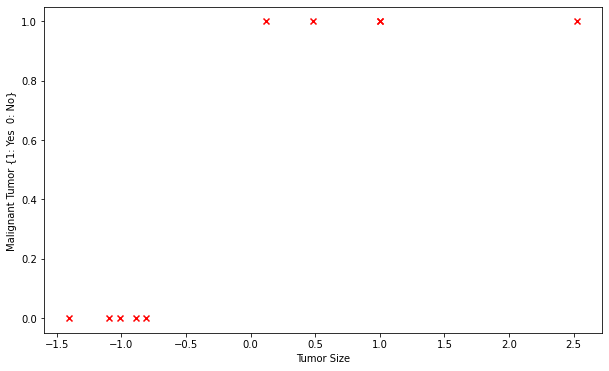

In [14]:
# Plotting 
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
plt.ylabel("Malignant Tumor {1: Yes  0: No}")
plt.xlabel("Tumor Size")
plt.show()

<br><br><br><br>
### What type of Problem is this? 
***
 - The output, "y" has two **categories** i.e. 1 (Yes) or 0 (No) 
 
 - Thus, as we have learnt before, this is a **Classification Problem** where we are using our dependent variables, in this case Tumor Size, and are getting a **binary** output, 1 (Yes) or 0 (No)! 
 
 - Let's approach this problem with what we've learnt so far

<br><br><br><br>
### The Problem Explained
***
 - We have a dataset which has details about the loan approval.
 - Through the dataset, we basically want to find out that using different characteristics, do loans get approved {1: Yes} or not {0: No}
 - This is, in essence, nothing but a classification problem. 
 
 - We wanted to check, before applying, whether our request would be approved after we fit the **right model** on the data! 
 - But before we do that, let's build our intution on the '*model building*' part using the Tumor data! You will see how comprehensive this approach is

<br><br><br><br>
## Can Linear Regression be used to solve a classification problem?
***

* Lets try and apply the same Linear Regression model we learned to solve the problem of classification on a dataset.

In [15]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [16]:
z = np.linspace(-2, 2, 1000)
z_predict = lm.intercept_ + (lm.coef_ * z)

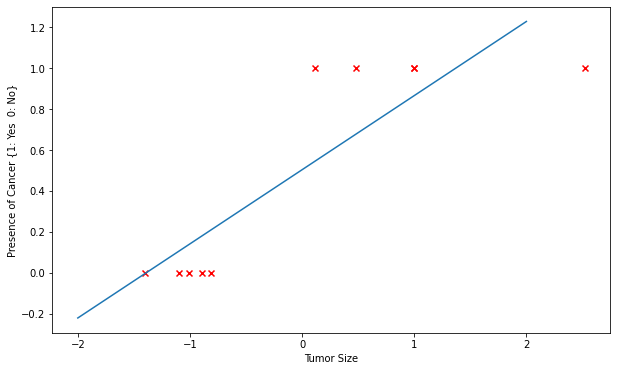

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
plt.plot(z, z_predict)
plt.ylabel("Presence of Cancer {1: Yes  0: No}")
plt.xlabel("Tumor Size")
plt.show()

### Intuition behind the Decision Boundary
***
* We have fitted a linear regression model which is represented by the blue line
* How do we convert a continuous output into a discrete one?
* One way we can do is using a threshold value for the linear regression output


* Our output is either 1 or 0, and since we can even get predicted values between 0 and 1 like 0.2, 0.6, etc. (The regression line), we need to come up with a method where our output (0.2, 0.6, etc) is **transformed** to either **0** or **1**


* A reasonable threshold to keep for a 0-1 problem is 0.5. So, if our predicted value (y) is **greater than 0.5** then we assign a **"1"** to it 
* If y is **less than 0.5** then we assign a **"0"** to it


<br><br><br><br>
## What is Decision Boundary?
***

* Tracing the line of y = 0.5 all the way to it's corresponding x - value (See graph below) we can get to know this "Threshold" value

* This "Threshold Value" is x = __

* This means that if x > _ then y > 0.5 (i.e. y = 1) 

* If x < _ then y < 0.5 (i.e. y = 0)

* Therefore, this vertical line (x = _ ) which separates the 2 classes (y = 1 & 0) ---> **Decision Boundary**

Text(0, 0.5, 'Target')

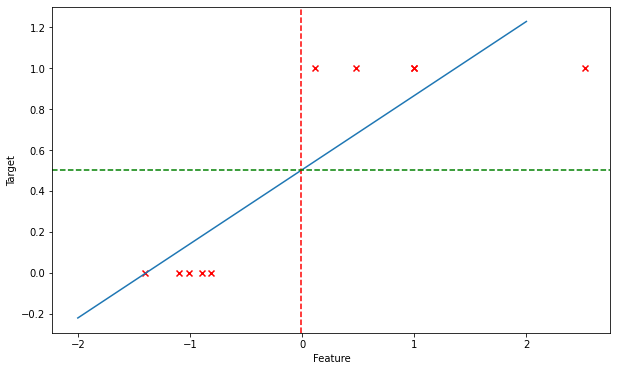

In [18]:
x_critical = (0.5 - lm.intercept_)/ lm.coef_

plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
plt.plot(z, z_predict)
plt.axvline(x=x_critical, color='r', linestyle='--')
plt.axhline(y=0.5, color='g', linestyle='--')
plt.xlabel('Feature')
plt.ylabel('Target')

<br><br><br><br>
### Linear Regression - Not a Good Idea
***
* The problem with this approach is that Linear Regression isn't robust to outliers and it changes the fit drastically in the presence of an outlier


* We'll add an outlier and keep the same threshold as before to see the difference.

In [19]:
new_obs = 20
X = np.vstack([X, new_obs])
y = np.append(y, 1)
lm = LinearRegression()
lm.fit(X, y)
z = np.linspace(-2, new_obs, 1000)
z_predict = lm.intercept_ + (lm.coef_ * z)
x_critical2 = (0.5 - lm.intercept_)/ lm.coef_

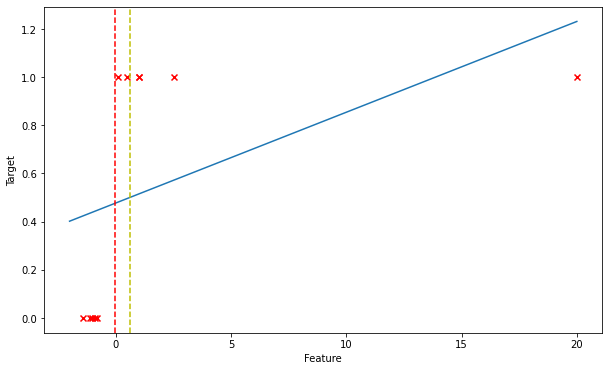

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
plt.plot(z, z_predict)
plt.axvline(x=x_critical, color='r', linestyle='--')
plt.axvline(x=x_critical2, color='y', linestyle='--')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

<br><br><br><br>
### Linear Regression - Not a Good Idea 
***
* We see that our Decision Boundary has shifted to the right. As a result we get some incorrect predicted "y-values" (the one's left of the boundary) 

* Since the data is labeled we know that they're originally = "1". But being on the left of the decision boundary indicates that they should be assigned a "0"

* Thus Linear Regression is not suitable for classification tasks as it is highly sensitive to outliers

* We clearly need a better model to solve the problem of classification

<br><br><br><br><br><br><br><br>
## Enter Logistic Regression
***
* To overcome the limitations of Linear Regression we'll use another model suitable for classification i.e., Logistic Regression.


* What do we need? 
  - We need 0 <= y <= 1
  
* For this purpose we need to use a different function (and not the Linear Regression "y = mx + b")

* This function is the **Sigmoid Function**


<br><br><br><br>
## Sigmoid function
***
* We need to get the values in the range of (0,1) 

* Let's have a look at the graph of the Sigmoid Function and then get into building the intuition
***

<center><img src="https://raw.githubusercontent.com/bluedataconsulting/AIMasteryProgram/main/Lab_Exercises/Module4/images/sigmoid.png" alt="Oh Chris" style="width: 275px;"/></center>

## Intuition
***
 - The function above is $g(z) = \frac {1} {(1 + e^(-z))}$   for values of t ranging from - infinity , + infinity
 
 - $g(z)$ is also called as "Sigmoid of 'z' or just sig(z)"
 
 - Again, let's start by plugging in the extremes of it's range
 
 $g(-infinity) = \frac {1} {(1 + infinity)} = ~0$
 
 
   $g( infinity) = \frac {1} {(1 + ~0)} = ~1$
 
 - No matter what value "z" takes, we will always get an answer in the range of **[0,1]**

<br><br><br><br>
### Simple Modifications
***

 - Now, instead of sig(z) let's consider sig(y) **where y ---> our response**
 
 - But as discussed before; $y = \theta_0 + \theta_1(x1) + \theta_2(x_2) + .. + \theta_n(x_n)$
 
 - Thus, $g(y) = g(h_{\theta}(x)) = 1/(1 + e^{-(\theta* X)})$

<br><br><br><br>
### Interpretation - Let's put it simply
***
In essence: 

 - $h_θ(x)$ is the ** Estimated Probability that y = 1 on input "X"** 
 
 - Example: $h_θ(x)$ = 0.7 in our Tumor problem **MEANS** there is a 70% chance of Tumor being **Malignant**
 
 - Thus, mathematically, $h_θ(x)$ = P(y=1 | x; θ) means that **Probability that y = 1 given X and parameterized by θ**
 
 - Thus **P(y=1 | x;θ) + P(y=0 | x;θ) = 1**



<br><br><br><br>
### Decision Boundary Intuition with Examples
***

We can see that g(z) >= 0.5 when z >= 0

Thus $h_θ(x)$ = g(θ*X)) >= 0.5 whenever θ x $X$ >= 0

<center><img src="https://raw.githubusercontent.com/bluedataconsulting/AIMasteryProgram/main/Lab_Exercises/Module4/images/sigmoid.png" alt="Oh Chris" style="width: 275px;"/></center>

 - Consider: $h_θ(x) = g(θ_0 + θ_1x_1 + θ_2x_2)$

 - The graph below shows y - values (0 when "O" & 1 when "X") given values of $x_1$& $x_2$
***
<center><img src="https://raw.githubusercontent.com/bluedataconsulting/AIMasteryProgram/main/Lab_Exercises/Module4/images/logistic_regression.png" alt="Math" style="width: 275px;"/></center>

So, for example  $θ_0 = -3, θ_1 = 1, θ_2 = 1$
     
So our parameter vector is a column vector with the above values
   - So, $θ^T$  = [-3,1,1]
   
Thus the z here becomes θ x $X$


In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

X, y = make_classification(n_samples=10, n_features=1, n_informative=1, n_redundant=0 , n_clusters_per_class=1, flip_y=0, random_state=7)
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

Text(0, 0.5, 'Target')

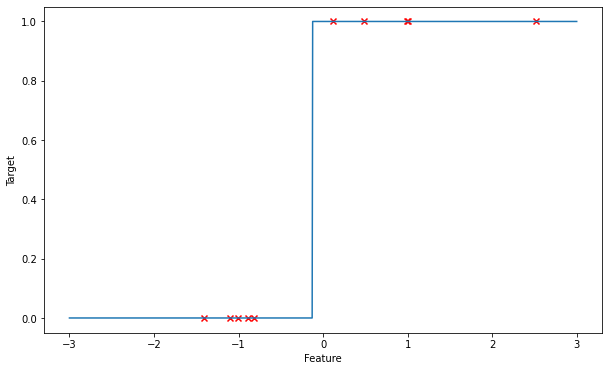

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
xt = np.linspace(-3, 3, 1000).reshape(1000,1)
yt = clf.predict(xt)
plt.plot(xt, yt)
plt.xlabel('Feature')
plt.ylabel('Target')

* In the case with no outliers Logistic Regression does a good job in seperating the classes
* We'll add an outlier and check if it still manages to do the same

In [23]:
new_obs = 20
X = np.vstack([X, new_obs])
y = np.append(y, 1)
clf.fit(X, y)

LogisticRegression()

Text(0, 0.5, 'Target')

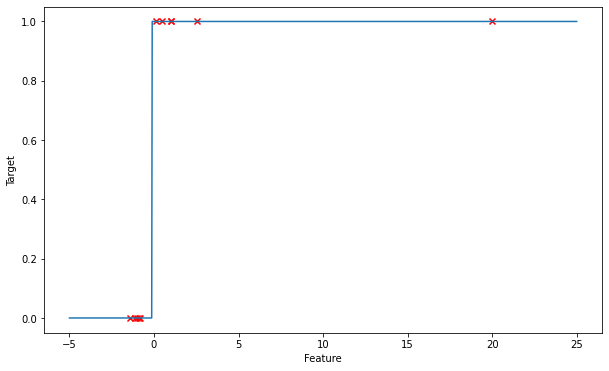

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
xt = np.linspace(-5, 25, 1000).reshape(1000,1)
yt = clf.predict(xt)
plt.plot(xt, yt)
plt.xlabel('Feature')
plt.ylabel('Target')

* Even after adding outliers LR seperates the classes well.
* Thus its much more suitable for classification.


### Thank you!